<a href="https://colab.research.google.com/github/NzambiGrace/ImageClassifierPro/blob/main/ANN_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Image classification using CNN

In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np


In [3]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()
x_train.shape

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


(50000, 32, 32, 3)

### Data Exploration

In [4]:
x_test.shape

(10000, 32, 32, 3)

In [5]:
### Analyzing the y dataset
### Notoce taht it contains 50,000 samples and 1 dimensional array
y_train.shape

(50000, 1)

In [6]:

y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

###  Notice that the above y_train is in 2-dimensional array , thus I reshape it to a 1 dimensional array

In [7]:
y_train =y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [8]:
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
classes[9]

'truck'

In [9]:
#### Defining plot_sample function for visualizing the images
def plot_sample(x, y, index):
  plt.figure(figsize = (15,2))
  plt.imshow(x[index])
  plt.xlabel(classes[y[index]])

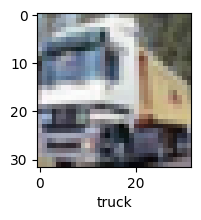

In [10]:
plot_sample(x_train, y_train, 1)

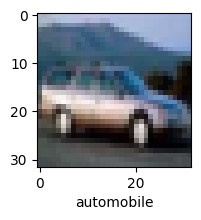

In [11]:
plot_sample(x_train, y_train, 4)

### Data Preprocessing

###### Normalization
We normalize the image data by 255 because a pixel value ranges from 0 to 255, thus dividing it by 255 we normalize to a 0 to 1 range.

In [12]:
x_train = x_train /255
x_test = x_test /255

### Modelling

##### ANN

In [13]:
ann = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000, activation='relu'),
    layers.Dense(1000, activation= 'relu'),
    layers.Dense(10, activation = 'sigmoid')
])

ann.compile (optimizer = 'SGD',
             loss ='sparse_categorical_crossentropy',
             metrics = ['accuracy'])

ann.fit(x_train, y_train, epochs=5)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 89s 57ms/step - accuracy: 0.3034 - loss: 1.9335
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 134s 52ms/step - accuracy: 0.4193 - loss: 1.6457
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 84s 53ms/step - accuracy: 0.4526 - loss: 1.5597
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 133s 47ms/step - accuracy: 0.4781 - loss: 1.4804
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 45ms/step - accuracy: 0.4968 - loss: 1.4310


##### The ANN has an avarage accuracy performance of 45% on train sample

In [14]:
ann.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.4877 - loss: 1.4302


[1.4350576400756836, 0.4846999943256378]

##### The avarage performance on test data is 48%, which shows that the ANN is performing really bad on this data with 5 epochs




---



In [15]:
# Classification Report
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
y_pred = ann.predict(x_test)
y_pred_classes = [np.argmax(element) for element in y_pred]
print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.56      0.48      0.52      1000
           1       0.58      0.65      0.61      1000
           2       0.43      0.26      0.32      1000
           3       0.36      0.30      0.33      1000
           4       0.38      0.52      0.44      1000
           5       0.43      0.31      0.36      1000
           6       0.52      0.53      0.53      1000
           7       0.60      0.48      0.53      1000
           8       0.48      0.75      0.59      1000
           9       0.51      0.58      0.54      1000

    accuracy                           0.48     10000
   macro avg       0.48      0.48      0.48     10000
weighted avg       0.48      0.48      0.48     10000

